In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv")
df.head(5)

,Team,Goals (Dependent),Shots (Independent)
0,Philadelphia Flyers,32,231
1,New Jersey Devils,29,215
2,Detroit Red Wings,26,300
3,New York Rangers,24,208
4,Montreal Canadians,26,229


In [3]:
df.columns

Index(['Team', 'Goals (Dependent)', 'Shots (Independent)'], dtype='object')

In [4]:
df['Team'].unique()

array(['Philadelphia Flyers', 'New Jersey Devils', 'Detroit Red Wings',
       ' New York Rangers', 'Montreal Canadians', 'Boston Bruins',
       'New York Islanders', 'Edmonton Oilers ', 'Phoenix Coyotes',
       'Ottawa Senators', 'Anaheim Mighty Ducks', 'Toronto Maple Leafs',
       'Vancouver Canucks', 'Atlanta Thrashers', 'Washington Capitals',
       'Minnesota Wild', 'Calgary Flames', 'Nashville Predators',
       'Dallas Stars ', 'Los Angeles Kings', 'St.Louis Blues',
       'Pittsburgh Penguins', 'Tampa Bay Lightning', 'San Jose Sharks',
       'Florida Panthers', 'Chicago Blackhawks', 'Carolina Hurricanes',
       'Buffalo Sabres', 'Columbus Blue Jackets', 'Colorado Avalanche'],
      dtype=object)

In [5]:
df.shape

(30, 3)

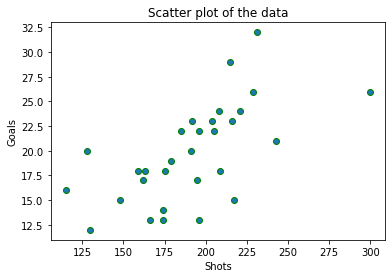

In [6]:
shots = df['Shots (Independent)']
goals = df['Goals (Dependent)']
plt.scatter(shots, goals, edgecolors='green')
plt.xlabel('Shots')
plt.ylabel('Goals')
plt.title('Scatter plot of the data')
plt.show()

In [7]:
X = np.asarray(df['Shots (Independent)']).reshape(-1, 1)
y = np.asarray(df['Goals (Dependent)']).reshape(-1, 1)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [9]:
from sklearn import linear_model

In [10]:
reg = linear_model.LinearRegression() 

In [11]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
reg.coef_

array([[0.0924909]])

In [13]:
reg.intercept_

array([2.19225935])

In [14]:
reg.predict([[50]])

array([[6.8168045]])

In [15]:
reg.predict([[222]])

array([[22.72523983]])

In [16]:
y_pred = reg.predict(X_test)

In [17]:
y_test

array([[14],
       [20],
       [17],
       [18],
       [22]])

In [18]:
y_pred

array([[18.28567648],
       [14.03109494],
       [20.22798544],
       [21.52285809],
       [19.30307641]])

In [19]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.9404697320542503
Mean Squared Error: 16.819733298433484
Root Mean Squared Error: 4.101186815841664


In [20]:
y_pred = reg.predict(X_train)

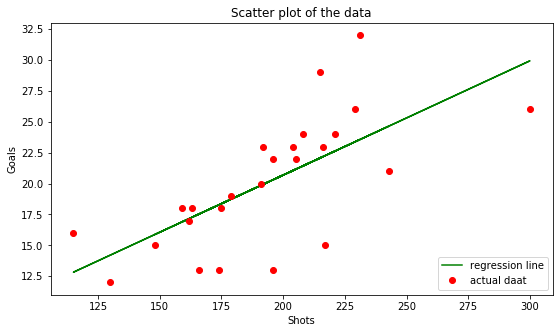

In [21]:
plt.figure(figsize=(9, 5))
plt.plot(X_train, y_pred, c = 'green', label = 'regression line')
plt.plot(X_train, y_train, 'ro', label = 'actual daat')
plt.xlabel('Shots')
plt.ylabel('Goals')
plt.title('Scatter plot of the data')
plt.legend(loc='lower right')
plt.show()

In [22]:
y_pred = reg.predict(X_test).flatten()
y_test = y_test.flatten()
df1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1.head()

,Actual,Predicted
0,14,18.285676
1,20,14.031095
2,17,20.227985
3,18,21.522858
4,22,19.303076


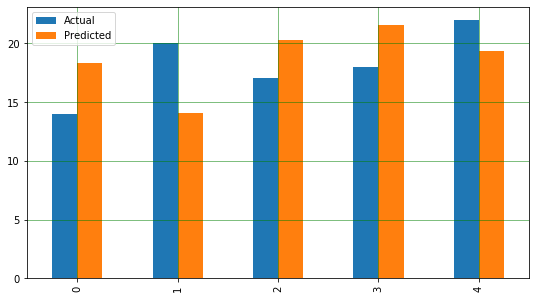

In [23]:
df1.plot(kind='bar',figsize=(9,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()